Reid Chen; Jibo Liu; Yuru Liu

# Introduction

In day-to-day life, one might need to face a various binary decision to make. For example, one might need to decide between going to library or not. Although it seems like a simple question, it soon gets overly complex when one asks multiple binary decision question to a larger sample size. The number of possible combinations grow exponentially with the increase of the number of binary question. If one consider 10 binary questions, one may have 1024(2 to the 10th power) possible combinations. Let’s consider a real life case: the board of a school needs to decide which combination of the courses to open for next semester in order to both satisfy most of the students’ demand and cut the expense as much as possible to put it under a desirable limit. It is not surprising that school needs to solve a problem like this and they can get an exhaustive data through surveys, which enables them to derive results. Similarly, In this project, we are to observe the optimal decision a sushi restaurant can make to satisfy customers’ demand. To expand further, we need to investigate which combinations of ingredients to purchase in order to satisfy customers’ demand. The reason why a problem like this incentivize a sushi restaurant to solve is because of the positive relationship between profit and customer satisfaction: high customers’ satisfaction in turn leads to greater customers’ retention, stronger restaurant’s reputation, and building a stronger customers’ base. Since the number of customers increases with the customers’ overall satisfaction, an optimized combination of ingredients in sushi results in a greater profit for the sushi restaurant. Therefore, this importance of analyzing this question is not only to satisfy majority of people (increase overall well-being), but also to increase profit or sustainability. Our data comes from the sushi dataset [2]. In the sushi dataset, each user is asked to order their preference for 10 sushis. We will use the ranking of their preference to generate their response to pair-wise query. We extract "Heaviness Taste" and "Normalized Price" to represent sushis.

# Mathematical Model

## Basic Setting

Let $\mathcal{X} = \{x_i\}_{i=1}^m \subset \mathbb{R}^d$ be a set of items.
Suppose we have $n$ people (users) where $i$ denote the $i^\text{th}$ person. We could query that person $i$ with the following pair-wise question:

> Do you prefer $x_j$ or $x_k$?

Let $\mathcal{P} = \{p_i\}_{i=1}^N$ be a set of user preference, where $p_i$ is the preference of the $i^\text{th}$ person.
Assume that each person has its own preference point lying in the same space as $\mathcal{X}$, i.e. $\mathcal{P}
\subset \mathbb{R}^d$. Then, if that
person prefers $x_j$ over $x_k$, we could say that
$$
d(u_i, x_j) < d(u_i, x_k),
$$
where $d(u, v)$ is the Euclidean distance between $u$ and $v$. Geometrically, if we consider a hyperplane $h_{j}$ that
perpendicularly bisects the line segment connecting $x_j$ and $x_k$, then, $d(u_i, x_j) < d(u_i, x_k)$ implies that $u_i$
and $x_j$ lie on the same halfspace relative to $h_{jk}$.

![Fig 1](fig1.png "Figure 1")

For each pair of items in $p_k = (x_i, x_j) \in \mathcal{X} \times \mathcal{X}$, where $i < j$, we could query the question
involving $p_k$ to $n$ people. We could form a $\binom{m}{2}$ dimensional vector $q$, where the $k^\text{th}$ entry
is equivalent to the fraction of people who is closer to the item with a lower index in $p_k$ (i.e. the left-most
element of the tuple).

Moreover, by repeatedly querying the users, we form multiple hyperplanes in $\mathbb{R}^d$. These hyperplanes intersect with
each others and produce multiple polytopes. Let $p$ denote a probability vector whose dimension equals to the number of
polytopes formed. Our goal is to estimate the probability mass of user preferences in each of
these polytopes. In other word, we would like to estimate $p$.

To achieve such a goal, we note that we could form a binary matrix $M$ such that
$$
Mp = q,
$$
where the 1's on the $k^\text{th}$ row of $M$ corresponds to the polytopes that constitute the halfspace on the left side
of the $k^\text{th}$ hyperplane [1].
![Fig 2](fig2.png "Figure 2")

For example, $p1, p5, p6, p7$ are on the left of $h_1$; $p_1, p_2, p_6$ are on the left of $h_2$; and $p_1, p_2, p_3, p_7$ are on the left of $h_3$. Our $M$ matrix looks like

$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 1 & 1 & 1 \\
1 & 1 & 0 & 0 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

The optimization problem here is that giving observed $\hat{q}$ and $M$, we would like to solve for $p$, i.e.

\begin{align*}
\min_p &\quad || Mp - q||^2_2 \\
\text{subject to} &\quad \sum_i p_i = 1 \\
&\quad p_i >= 0.
\end{align*}

## Regularization

Note that when $d = 1$, matrix $M$ is full-rank. Therefore, there is a unique solution to the optimization problem.
However, then $d > 1$, $M$ is no longer full-rank. We need to resort regularization to help us pinpoint a
unique solution. We will apply

1. LASSO regularization
2. Ridge regression

when $d > 1$.

The regularized optimization problem is stated below

1. LASSO Regularization

\begin{align*}
\min_p &\quad || Mp - q||^2_2  + \lambda || p ||_1\\
\text{subject to} &\quad \sum_i p_i = 1 \\
&\quad p_i >= 0 \\
&\quad \lambda > 0
\end{align*}

2. Ridge Regression

\begin{align*}
\min_p &\quad || Mp - q||^2_2  + \lambda || p ||^2_2\\
\text{subject to} &\quad \sum_i p_i = 1 \\
&\quad p_i >= 0 \\
&\quad \lambda > 0
\end{align*}

## Polytope Enumeration


Since 1's on the $k^\text{th}$ row of $M$ corresponds to the polytopes that constitute the halfspace on the left side of the $k^\text{th}$ hyperplane, we need to be able to figure out which polytopes are on the left side of a hyperplane, in order to construct the matrix $M$.

From the basic setting of the problem, we know that these polytopes are defined by the hyperplanes that perpendicularly bisect the line segment that connects each possible pair of item in $\mathcal{X}$. Hence, our problem can formally described as follows:

Given a set of hyperplanes $\mathcal{H} = \{h_{ij} : (x_{i}, x_{j}) \in \mathcal{X}^2, i < j \}$ that is isomorphic to the set of all possible pairs. We would like to
1. Find all polytopes involves by $h, \text{for all } h \in \mathcal{H}$,
2. Find all polytopes that are on the left of $h, \text{for all }h \in \mathcal{H}$.
To make our life easier, we define a bounding box, $[-1, 1]^d$, so that we only look at the polytopes within the bounding box, in order to avoid unbounded polytopes.

Our algorithm works as follows:
Let $\mathcal{B}$ denote the set of hyperplanes that defines the bounding box.
Let $\mathcal{T}$ denote a set of polytopes we have discovered. We consider the bounding box as a polytope. Therefore,
at the beginning, $\mathcal{T} = \{ \mathcal{B} \}$

- For each $h \in \mathcal{H}$
  - For each $T \in \mathcal{T}$:
    - If $h$ intersects with one of the hyperplane $h_{t} \in T$ then
      - $T_{l} \leftarrow T \cup \{ h \}$
      - $T_{r} \leftarrow T \cup \{  -h \}$
      - $\mathcal{T} \leftarrow \mathcal{T} \setminus T$
      - $\mathcal{T} \leftarrow \mathcal{T} \cup \{ T_{l}, T_{r} \}$

Of course, the crux of the algorithm is to check if a hyperplane intersects with a polytope. We use Chebyshev center to determine the truth value of such predicate:

Given a hyperplane $h$ and a polytope $T$, we find the Chebyshev center of $T \cup \{ h \}$ and $T \cup \{ -h \}$. Finding the Chebyshev center is equivalent to solving a linear program. 

\begin{align*}
\max_{y, r >= 0} &\quad r \\
\text{subject to} &\quad a_{i}^Ty + || a_{i} ||r \leq b_{i}, \quad \forall i \in [|T| + 1]\\
\end{align*}

where $[a_{i} \quad b_{i}]$ is the $i^\text{th}$ vector in $T \cup { \pm h}$.

If the two linear program has bounded solution, and the solution is in $T$, we say that $h$ intersects $T$, otherwise we
say that $h$ does not intersect $T$. To determine which polytope is on the left side of which hyperplane, we just need
to check if the Chebyshev center of that polytope is on the left of the hyperplane.

# Solution

We will implement the 1D version our our method, which does not require any regularization. Data for the 1D are generated by us. We assume both items and users are follow a uniform distribution. Our results show that we are able to construct an estimate that is close to the true probability mass.

Then, we will apply our method to the Sushi dataset [2]. In the sushi dataset, each user is asked to order their preference for 10 sushis. We will use the ranking of their preference to generate their response to pair-wise query. We extract "Heaviness Taste" and "Normalized Price" to represent sushis.

In [1]:
using Random;
using Combinatorics;
using JuMP
using HiGHS
using Plots
using LazySets
using Polyhedra
using LinearAlgebra
using CSV
using DataFrames

## 1D

In [2]:
function generate_x_1d(m, seed)
    Random.seed!(seed) # set random seed
    x = rand(m) # generate items
    pairs = sort([x[idx] for idx in combinations(1:m, 2)]) # generate all pairs
    midpoints = [(p[1] + p[2]) / 2 for p in pairs] # generate midpoints
    return x, pairs, midpoints
end

generate_x_1d (generic function with 1 method)

In [3]:
function generate_q_1d(n, midpoints, seed)
    Random.seed!(seed) # set random seed
    q = []
    # we assume the true user preference follows a uniform(0, 1) distribution
    for midpoint in midpoints
        users = rand(n) 
        append!(q, sum(users .< midpoint) / n)
    end
    append!(q, 1)
    return q
end

generate_q_1d (generic function with 1 method)

In [4]:
function estimate_p_1d(size, q)
    # create M matrix
    # M matrix in 1D case is triangular (hence full rank, unique solution)
    M = ones((size, size))
    for i in 1:size
        for j in 1:size
            if j > i
                M[i, j] = 0
            end
        end
    end

    m = Model(HiGHS.Optimizer)
    @variable(m, p[1:size] >= 0)
    @constraint(m, sum(p) == 1)
    @objective(m, Min, sum((M * p - q) .^ 2))
    optimize!(m)

    return value.(p)
end

estimate_p_1d (generic function with 1 method)

Running HiGHS 1.5.1 [date: 1970-01-01, git hash: 93f1876e4]
Copyright (c) 2023 HiGHS under MIT licence terms
0, 0.708895, 0, 0.000228, 0.000000, 0, 0.000000, 0.000000
7, 0.000000, 3, 0.000268, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 7
Objective value     :  1.1102230246e-15
HiGHS run time      :          0.00


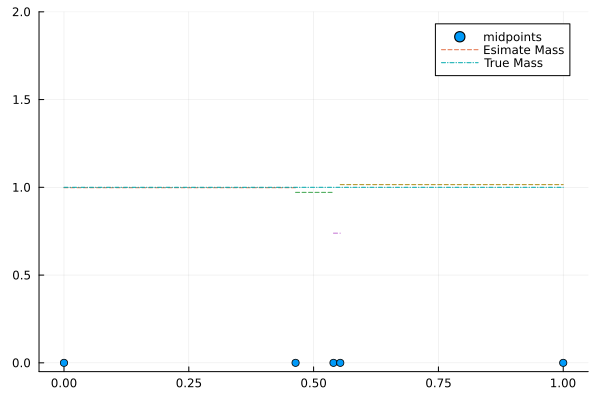

In [5]:
x, pairs, midpoints = generate_x_1d(3, 42);
q = generate_q_1d(10000, midpoints, 42);
p = estimate_p_1d(length(q), q);

append!(midpoints, 1)
insert!(midpoints, 1, 0)
plot(midpoints, zeros(length(midpoints)), seriestype=:scatter, label="midpoints")
for i in 1:length(midpoints) - 1
    base = midpoints[i + 1] - midpoints[i]
    height = p[i] / base
    if i == 1
        plot!([midpoints[i], midpoints[i + 1]], [height, height], label="Esimate Mass", linestyle=:dash)
    else
        plot!([midpoints[i], midpoints[i + 1]], [height, height], label=false, linestyle=:dash)
    end
end
plot!([0, 1], [1, 1], label="True Mass", linestyle=:dashdot)
xlims!(-0.05, 1.05)
ylims!(-0.05, 2)

## Sushi

In [6]:
user_preference = CSV.read("user_preference.csv", DataFrame, header=false);

In [7]:
sushi_features = Matrix(CSV.read("sushi_features.csv", DataFrame));

In [8]:
function plot_hyperplanes_2d(hyperplanes, lb, ub, p)
    # method for plotting hyperplanes
    n, _ = size(hyperplanes)
    for i in 1:n
        a1 = hyperplanes[i, 1]
        a2 = hyperplanes[i, 2]
        b = hyperplanes[i, 3]
        if a2 != 0
            x1 = LinRange(lb, ub, 10)
            x2 = (-a1 .* x1 .- b) ./ a2
        else
            x2 = LinRange(lb, ub, 10)
            x1 = (-a2 .* x2 .- b) ./ a1
        end
        plot!(x1, x2, label="hyerplane: $(i)")
    end
    xlims!(lb, ub)
    ylims!(lb, ub)
    return p
end

function calculate_hyperplanes(items, pairs, d)
    h_s = zeros(length(pairs), d + 1)
    for i in 1:length(pairs)
        l_pt_idx, r_pt_idx = pairs[i]
        l_pt, r_pt = items[l_pt_idx, :], items[r_pt_idx, :]
        m_pt = (r_pt + l_pt) / 2
        a = (r_pt - l_pt) / norm(r_pt - l_pt)
        b = -dot(m_pt, a)
        h_s[i, 1:d] .= a
        h_s[i, d+1] = b
    end
    return h_s
end

function is_in(region, p)
    n, d = size(region)
    return all(region[:, 1:d - 1] * p - region[:, d] .< 0)
end

function chebyshev_center(hyperplanes)
    # model for finding chebyshev center
    n, d = size(hyperplanes)
    c_model = Model(HiGHS.Optimizer)
    set_silent(c_model)
    @variable(c_model, r >= 0)
    @variable(c_model, y[1:d-1])
    for i in 1:n
        @constraint(c_model, hyperplanes[i, 1:d-1]' * y + norm(hyperplanes[i, 1:d-1]) * r <= hyperplanes[i, d] )
    end
    @objective(c_model, Max, r)
    optimize!(c_model)

    if termination_status(c_model) == INFEASIBLE
        return nothing
    else
        return value.(y)
    end
end

function check_intersection(h, h_o, region)
    p = chebyshev_center([region; h'])
    p_o = chebyshev_center([region; h_o'])
    if p == nothing || p_o == nothing
        return false, p, p_o
    elseif is_in(region, p) && is_in(region, p_o)
        return true, p, p_o
    else
        return false, nothing, nothing
    end
end

function generate_regions(hyperplanes, faces)
    regions = Set([faces])
    for i in 1:size(hyperplanes)[1]
        h = hyperplanes[i, :]
        h_o = -1 .* h
        intersected_regions = []
        for region in regions
            is_intersected, p, p_o = check_intersection(h, h_o, region)
            if is_intersected
                push!(intersected_regions, region)
            end
        end

        for region in intersected_regions
            r = [region; h']
            r_o = [region; h_o']
            setdiff!(regions, Set([region]))
            union!(regions, Set([r]))
            union!(regions, Set([r_o]))
        end
    end
    return regions
end

function create_M_matrix(regions, hyperplanes)
    regions = collect(regions)
    num_regions =length(regions)
    num_hyperplanes, _ = size(hyperplanes)
    lefts = []
    for i in 1:num_regions
        region = regions[i]
        left_of = []
        n, d = size(hyperplanes)
        for i in 1:n
            a, b = hyperplanes[i, 1:d-1], hyperplanes[i, d]
            if (chebyshev_center(region)') * a - b <= 0
                push!(left_of, i)
            end
        end
        push!(lefts, left_of)
    end

    M = zeros((num_hyperplanes + 1, num_regions))
    h_to_nodes = Dict()
    for h_idx in 1:num_hyperplanes
        h_to_nodes[h_idx] = []
    end

    for region_idx in 1:num_regions
        for h_idx in lefts[region_idx]
            push!(h_to_nodes[h_idx], region_idx)
        end
    end

    for (h_idx, region_indices) in h_to_nodes
        M[h_idx, region_indices] .= 1
    end

    M[num_hyperplanes + 1, :] .= 1
    return M, regions
end

function estimate_q_hat(m, d, user_preference)
    num_users, _ = size(user_preference)
    pairs = collect(combinations(1:m, d))
    n = length(pairs)
    q_hat = zeros(n + 1)
    n_p = num_users ÷ n
    for i in 1:n
        pair = pairs[i]
        left, right = pair[1], pair[2]
        users = user_preference[((i - 1)*n_p + 1):(i * n_p), :]
        users = Matrix(users)
        for j in 1:n_p
            left_ord = findfirst(x -> x == left, users[j, :])
            right_ord = findfirst(x -> x == right, users[j, :])
            if left_ord <= right_ord
                q_hat[i] += 1
            end
        end
        q_hat[i] /= n_p
    end
    q_hat[n + 1] = 1
    return q_hat
end
    
function estimate_p_hat(M, q, λ, method)
    a, b = size(M)
    model = Model(HiGHS.Optimizer)
    set_silent(model)
    @variable(model, p[1:b] >= 0)
    @constraint(model, sum(p) == 1)
    if method == "l1"
        @objective(model, Min, sum((M * p - q) .^ 2) + λ * sum(p))
    else
        @objective(model, Min, sum((M * p - q) .^ 2) + λ * sum(p .^ 2))
    end
    optimize!(model)
    return value.(p)
end

m = 5
d = 2
faces = [-1.0 -0.0 1.0; 0.0 -1.0 1.0; 0.0 1.0 1.0; 1.0 -0.0 1.0];
items = sushi_features;
pairs = collect(combinations(1:m, d));
hyperplanes = calculate_hyperplanes(items, pairs, d);
regions = generate_regions(hyperplanes, faces);
M, regions = create_M_matrix(regions, hyperplanes);
q_hat = estimate_q_hat(m, d, user_preference);
p_hat_l1 = estimate_p_hat(M, q_hat, 0.5, "l1");
p_hat_l2 = estimate_p_hat(M, q_hat, 0.5, "l2");

# Results and Discussion

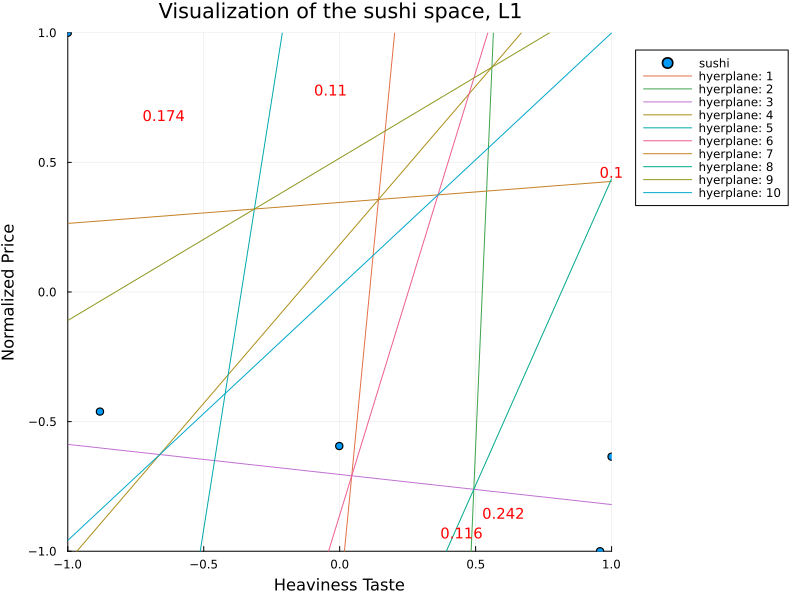

In [9]:
p = scatter(items[:, 1], items[:, 2], size=(800, 600), label="sushi", legend=:outertopright)
xlabel!("Heaviness Taste")
ylabel!("Normalized Price")
for i in 1:length(regions)
    region = regions[i]
    center = chebyshev_center(region);
    # scatter!([-center[1]], [-center[2]])
    if p_hat_l1[i] > 0.1
        annotate!(-center[1], -center[2], text("$(round(p_hat_l1[i], digits=3))", :red, :bottom, 10))
    end
end

title!("Visualization of the sushi space, L1")
plot_hyperplanes_2d(hyperplanes, -1, 1, p)

Red numbers represent the probability mass over the region that they stay at.
We only plot the probabilitiy mass that is greater than 0.1.

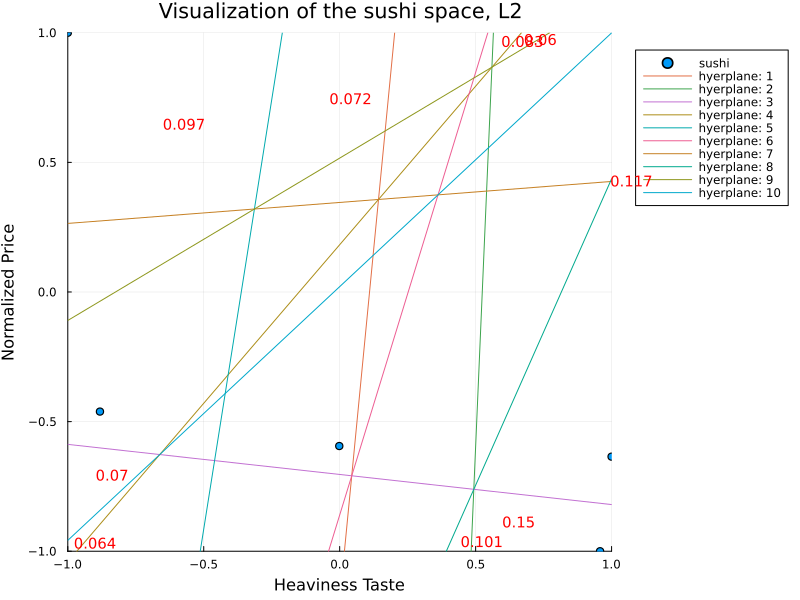

In [10]:
p = scatter(sushi_features[:, 1], sushi_features[:, 2], size=(800, 600), label="sushi", legend=:outertopright)
xlabel!("Heaviness Taste")
ylabel!("Normalized Price")
for i in 1:length(regions)
    region = regions[i]
    center = chebyshev_center(region);
    if p_hat_l2[i] > 0.05
        annotate!(-center[1], -center[2], text("$(round(p_hat_l2[i], digits=3))", :red, :left, 10))
    end
end

title!("Visualization of the sushi space, L2")
plot_hyperplanes_2d(hyperplanes, -1, 1, p)

Red numbers represent the probability mass over the region that they stay at.
We only plot the probabilitiy mass that is greater than 0.05.

Under lasso regularization, one can conclude that majority of the people like either expensive sushi with a lighter taste or cheap sushi with a heavier taste. One can make such conclusion based on the fact that the probability mass on the left upper corner ($0.174$) and the probability mass on the right lower corner($0.358$, which is from addition of $0.242 + 0.116$). Under ridge regression, one can notice the major discrepancies between the results derived from lasso regularization and the ridge regression. The dominant number on the upper left corner and the right lower corner diminished to a rather more average number compared to other numbers in the corner. However, there is still a noticeable trend that people prefer less expensive sushi with heavier taste than more expensive sushi with lighter taste since the sum of probability mass for the left upper section is substantially greater than the sum of probability mass for the lower right section. Although, there are some discrepancies with the results between these two method, the general trend of preference still persist. It is not hard to fathom why given that the basic for these two method are the same: regularization. Note that the regularization methods we used in the paper do not consider the possiblity that polytopes that close to each other should have similar probability mass, after normalizing by their volume. We would like to investigate method of consider such possiblity.

# Conclusion

In this project, we try to find out the probability of customers choosing different sushi by finding the probability density corresponding to different levels of price and heavy taste characteristics of sushi. In the result, we could find that sushi with $[-0.75，-0.45]$ price and $[0.5，1]$ heavy taste are more attractive to customers. We successuflly provide a method which is proposed to estimate the probability distribution of user preferences in a polyhedron divided by multiple hyperplanes.

Future direction:
1. Applying this method to the food delivery recommendation system, more accurate personalized menu recommendation can be provided by understanding the user's preference distribution. This method can help the recommendation system better understand users' preferences and needs, and make it easier for users to find their favorite food, thus improving the accuracy of recommendation and user satisfaction. At the same time, for the newly launched goods, the system can use our method to predict different customers' preferences for the goods according to the characteristics of the goods. This will help the recommendation system to provide users with more accurate recommendations when new products are launched and increase the attention and sales of new products. In addition, by analyzing the distribution of users' preferences, delivery platforms can find that certain types of food are very popular among certain user groups. This will help the platform work more closely with such merchants to jointly introduce new foods that are more tailored to users' needs based on their preferences for food features.
2. Understanding the distribution of users' preferences can help businesses develop more targeted marketing campaigns. For example, based on the probability distribution of user preferences in a multicellular body, a company can customize personalized advertisments based on user preferences. At the same time, the preference probability distribution can be obtained by region and corresponding advertisements can be placed according to the preference probability of different regions. This allows advertisments to be more accurately targeted at the customer base, which increases conversion rates and return on investment (ROI). In addition, for new advertisments, the best areas to place the advertisments can be predicted by comparing the characteristics of the advertisments with the collected probability distribution to achieve the best conversion rate and ROI.

### References

[1] G. Tatli, R. Nowak and R. K. Vinayak, "Learning Preference Distributions From Distance Measurements," 2022 58th Annual Allerton Conference on Communication, Control, and Computing (Allerton), Monticello, IL, USA, 2022, pp. 1-8, doi: 10.1109/Allerton49937.2022.9929404.

[2] Kamishima, T., Akaho, S. (2009). Efficient Clustering for Orders. In: Zighed, D.A., Tsumoto, S., Ras, Z.W., Hacid, H. (eds) Mining Complex Data. Studies in Computational Intelligence, vol 165. Springer, Berlin, Heidelberg. https://doi-org.ezproxy.library.wisc.edu/10.1007/978-3-540-88067-7_15